# Quick Start Tutorial

- GluonTS toolkit - Components and tools for building time series models using MXNet


In [1]:
### Third-party imports

# vis
%matplotlib inline
import matplotlib.pyplot as plt

# standards
import numpy as np
import pandas as pd

# mxnet
import mxnet as mx
from mxnet import gluon

# json
import json


## Datasets


### GluonTS datasets

#### `gluonts.dataset.repository.datasets.get_dataset`

- Get a repository dataset

Parameters: 

- **dataset_name** - name of the dataset, for instance "m4_hourly"
- **regenerate** - whether to regenerate the data even if a local file is present. If this flag is False and the file is present, the dataset will not be downloaded again. 
- **path** - where the dataset should be saved

Returns a dataset by either downloading or reloading from local file. 




In [2]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

In [8]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly']


**To do**

- Download `m4_hourly` using the `get_dataset` method


In [9]:
dataset = get_dataset("m4_hourly", regenerate=True)

INFO:root:downloading and processing m4_hourly


saving time-series into C:\Users\TM\.mxnet\gluon-ts\datasets\m4_hourly\train\data.json
saving time-series into C:\Users\TM\.mxnet\gluon-ts\datasets\m4_hourly\test\data.json


Datasets provided by GluonTS are objects that consists of three main members: 

- `dataset.train` - is an iterable collection of data entries used for training. Each entry corresponds to one time series
- `dataset.test`- is an iterable collection of data entries used for inference. The test dataset is an extended version of the train dataset that contains a window in the end of each time series that was not seen during training. This window has length equal to the recommended prediction length. 
- `dataset.metadata` - contains metadata of the dataset such as the frequency of the time series, a recommended prediction horizon, associated features, etc. 



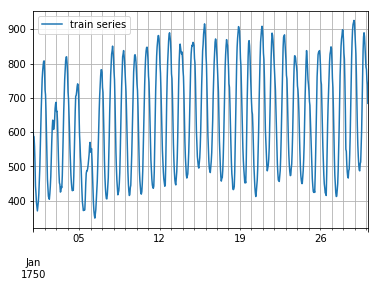

In [22]:
# datasets can be entered using list
# list(dataset.train)

# get one entry
entry = next(iter(dataset.train))

train_series = to_pandas(entry)
train_series.plot()

# add grid and legend
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()
